In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
planes = pd.read_csv("planes.csv")
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


Umumiy data frame infolarini va describtionlarini korib chiqamiz

In [4]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [5]:
planes.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


In [9]:
print(planes["Destination"].value_counts())
print("/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/")
print(planes["Source"].value_counts())



Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64
/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/
Source
Delhi       4451
Kolkata     2814
Banglore    2149
Mumbai       685
Chennai      374
Name: count, dtype: int64


Bunda biz umumiy uchgan samaliyotlar soni va qongan flight lar sonini korishmiz mumkin

In [24]:
pd.crosstab(planes["Source"],planes["Destination"])


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


Bu crosstableda bitta shahardan qancha uchgani va qanchasi qaysi viloyatga qonganini korishimiz mumkin

In [11]:
pd.crosstab(planes["Source"],planes["Destination"],values=planes["Price"],aggfunc="median")


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


Bunda biz ularning ortacha bilet narxlarini source va destination boyicha oldik

In [13]:
pd.crosstab(planes["Airline"],planes["Source"])

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Airline,,,,,
Air Asia,81,0,77,144,0
Air India,319,24,713,478,128
GoAir,85,0,72,23,0
IndiGo,501,176,667,428,184
Jet Airways,744,0,1490,1177,213
Multiple carriers,0,0,1131,0,0
SpiceJet,173,121,80,282,116
Vistara,169,42,44,173,23


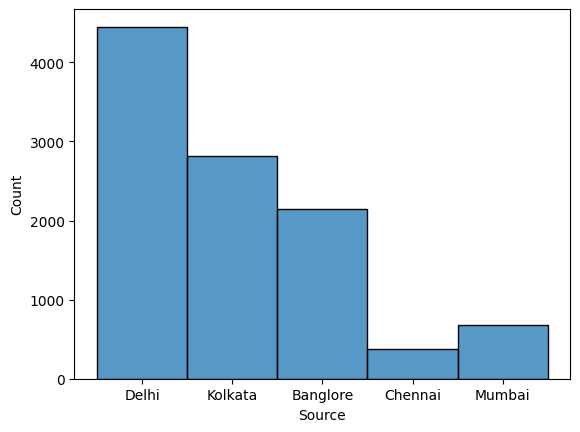

In [23]:
sns.histplot(planes, x="Source") 
plt.show() 

Bunda biz umumiy flightlar sourceni sonini viloyatlar kesimida korishimiz mumkin. Bundan malumki, eng kop parvozlar Dehli shahridan amalga oshirilar ekan


In [26]:
pd.crosstab(planes["Airline"],planes["Source"],values=planes["Price"],aggfunc="median")


Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Airline,,,,,
Air Asia,4282.0,NaN,6752.0,4409.0,NaN
Air India,7276.0,4667.0,9653.0,10676.0,3100.0
GoAir,4239.0,NaN,5842.0,7335.0,NaN
IndiGo,4823.0,3858.0,6496.0,4804.0,3175.0
Jet Airways,8016.0,NaN,12898.0,11467.0,5678.0
Multiple carriers,NaN,NaN,10051.0,NaN,NaN
SpiceJet,3971.0,3597.0,5583.0,3873.0,2017.0
Vistara,5403.0,6285.5,6216.0,8820.0,12395.0


In [25]:
pd.crosstab(planes["Airline"],planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Airline,,,,,,
Air Asia,143,75,67,0,0,17
Air India,474,695,115,126,24,195
GoAir,20,72,61,0,0,22
IndiGo,416,657,339,181,173,146
Jet Airways,1155,1474,345,207,0,388
Multiple carriers,0,1115,0,0,0,0
SpiceJet,282,80,127,116,118,38
Vistara,166,41,116,22,42,47


Yuqorida qiligan tahlillarni endi source uchun amalga oshirib kordik

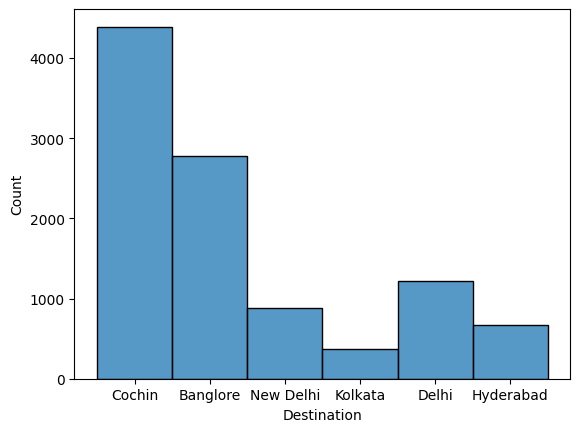

In [27]:
sns.histplot(planes, x="Destination") 
plt.show() 

Bunda ham eng kop parvozlar Cochin shahriga kelib qongan ekan

In [14]:
pd.crosstab(planes["Airline"],planes["Destination"],values=planes["Price"],aggfunc="median")


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Airline,,,,,,
Air Asia,4508.0,6752.0,4282.0,NaN,NaN,5048.5
Air India,10676.0,9679.5,6121.0,3100.0,4667.0,11003.0
GoAir,6815.5,5842.0,3898.0,NaN,NaN,6972.0
IndiGo,4804.0,6496.0,4423.0,3175.0,3858.0,6860.0
Jet Airways,11467.0,12898.0,7229.0,5678.0,NaN,13555.0
Multiple carriers,NaN,10090.0,NaN,NaN,NaN,NaN
SpiceJet,3873.0,5583.0,3945.0,2017.0,3597.0,6013.5
Vistara,8820.0,6216.0,4878.0,12395.0,6285.5,7608.0


In [20]:
planes.value_counts(subset=["Airline","Source"])

Airline            Source  
Jet Airways        Delhi       1490
                   Kolkata     1177
Multiple carriers  Delhi       1131
Jet Airways        Banglore     744
Air India          Delhi        713
IndiGo             Delhi        667
                   Banglore     501
Air India          Kolkata      478
IndiGo             Kolkata      428
Air India          Banglore     319
SpiceJet           Kolkata      282
Jet Airways        Mumbai       213
IndiGo             Mumbai       184
                   Chennai      176
SpiceJet           Banglore     173
Vistara            Kolkata      173
                   Banglore     169
Air Asia           Kolkata      144
Air India          Mumbai       128
SpiceJet           Chennai      121
                   Mumbai       116
GoAir              Banglore      85
Air Asia           Banglore      81
SpiceJet           Delhi         80
Air Asia           Delhi         77
GoAir              Delhi         72
Vistara            Delhi         44


Bundan biz shuni korishimiz mumkinki, bitta shahardan qaysi samaliyot turi qancha miqdorda uchirilganini va eng kopi qaysi samaliyotga tegishlik ekanini anglatadi


In [21]:
planes.value_counts(subset=["Airline","Destination"])

Airline            Destination
Jet Airways        Cochin         1474
                   Banglore       1155
Multiple carriers  Cochin         1115
Air India          Cochin          695
IndiGo             Cochin          657
Air India          Banglore        474
IndiGo             Banglore        416
Jet Airways        New Delhi       388
                   Delhi           345
IndiGo             Delhi           339
SpiceJet           Banglore        282
Jet Airways        Hyderabad       207
Air India          New Delhi       195
IndiGo             Hyderabad       181
                   Kolkata         173
Vistara            Banglore        166
IndiGo             New Delhi       146
Air Asia           Banglore        143
SpiceJet           Delhi           127
Air India          Hyderabad       126
SpiceJet           Kolkata         118
Vistara            Delhi           116
SpiceJet           Hyderabad       116
Air India          Delhi           115
SpiceJet           Cochin        

Endi shu narsa qonishlar soni uchun tahlil qilindi

In [29]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [30]:
planes['Price_to_numeric'] = pd.to_numeric(planes['Price'], errors='coerce').fillna(0)
planes


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price_to_numeric
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,11087.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0,12648.0


Bizda barcha datalar object typeda edi
biz ularni malum birlarini ozimiga moslab numericka otkazib oldik

In [32]:
planes["New_dur"] = pd.to_timedelta(planes["Duration"]).dt.total_seconds() / 60
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price_to_numeric,New_dur
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,13882.0,1140.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,6218.0,325.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,13302.0,285.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,3873.0,145.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,11087.0,930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0,4107.0,150.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0,4145.0,155.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0,7229.0,180.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0,12648.0,160.0


Timeni ham ozimiz uchun ishlatsa boladigan yaroqli typpega otkazdik

<function matplotlib.pyplot.show(close=None, block=None)>

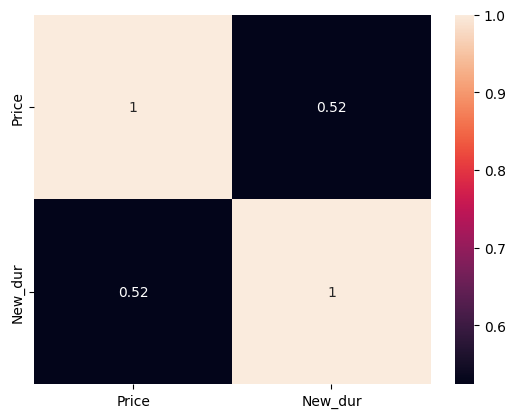

In [34]:
sns.heatmap(planes[["Price","New_dur"]].corr(),annot=True)
plt.show

Va bu ozgartirilgan datalar ortasidagi corralatsiyani korib chiqdik.

<function matplotlib.pyplot.show(close=None, block=None)>

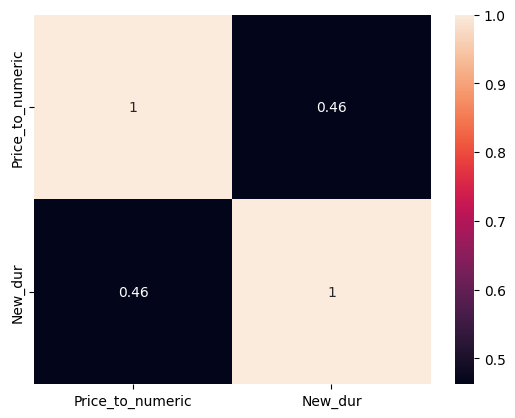

In [35]:
sns.heatmap(planes[["Price_to_numeric","New_dur"]].corr(),annot=True)
plt.show

Agar narxlarni numericca otkazganimizda bizda malum bir datalar yoqolib qollyapti va bogliqlik kamaymoqda

In [36]:
planes["replaced_one"] = planes["Total_Stops"].replace(to_replace="non-stop",value="0 stop")
planes["New_total_stops"] = pd.factorize(planes["replaced_one"],sort=True)[0]
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price_to_numeric,New_dur,replaced_one,New_total_stops
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,13882.0,1140.0,2 stops,2
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,6218.0,325.0,1 stop,1
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,13302.0,285.0,1 stop,1
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,3873.0,145.0,0 stop,0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,11087.0,930.0,1 stop,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0,4107.0,150.0,0 stop,0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0,4145.0,155.0,0 stop,0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0,7229.0,180.0,0 stop,0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0,12648.0,160.0,0 stop,0


Stoplar sonini ham ozimizga moslab encoding qilib oldik

In [37]:
planes["New_total_stops"].value_counts()

New_total_stops
 1    5503
 0    3411
 2    1488
-1     212
 3      45
 4       1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

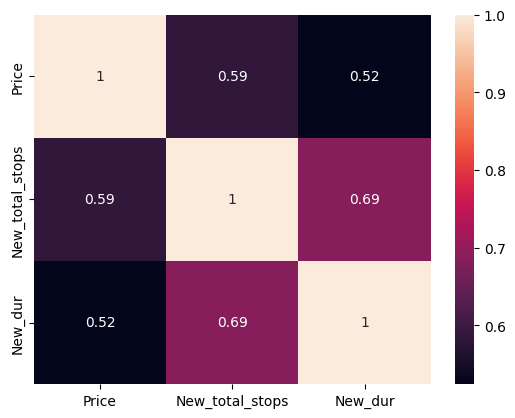

In [39]:
sns.heatmap(planes[["Price","New_total_stops","New_dur"]].corr(),annot=True)
plt.show



Bunda biz 3ta korsatkich narxlar va stoplar soni hamda uchish davomiyligi ortasidagi bogliqliklarni korib chiqdik. 

In [40]:
data1 = planes.dropna()
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Price_to_numeric,New_dur,replaced_one,New_total_stops
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,13882.0,1140.0,2 stops,2
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,6218.0,325.0,1 stop,1
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,13302.0,285.0,1 stop,1
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,3873.0,145.0,0 stop,0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,11087.0,930.0,1 stop,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10654,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257.0,3257.0,160.0,0 stop,0
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0,4107.0,150.0,0 stop,0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0,4145.0,155.0,0 stop,0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0,12648.0,160.0,0 stop,0


NaN larni drop qilib ishlab koramiz

In [43]:
planes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10233 non-null  object 
 1   Date_of_Journey   10338 non-null  object 
 2   Source            10473 non-null  object 
 3   Destination       10313 non-null  object 
 4   Route             10404 non-null  object 
 5   Dep_Time          10400 non-null  object 
 6   Arrival_Time      10466 non-null  object 
 7   Duration          10446 non-null  object 
 8   Total_Stops       10448 non-null  object 
 9   Additional_Info   10071 non-null  object 
 10  Price             10044 non-null  float64
 11  Price_to_numeric  10660 non-null  float64
 12  New_dur           10446 non-null  float64
 13  replaced_one      10448 non-null  object 
 14  New_total_stops   10660 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 1.2+ MB


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7848 entries, 0 to 10659
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           7848 non-null   object 
 1   Date_of_Journey   7848 non-null   object 
 2   Source            7848 non-null   object 
 3   Destination       7848 non-null   object 
 4   Route             7848 non-null   object 
 5   Dep_Time          7848 non-null   object 
 6   Arrival_Time      7848 non-null   object 
 7   Duration          7848 non-null   object 
 8   Total_Stops       7848 non-null   object 
 9   Additional_Info   7848 non-null   object 
 10  Price             7848 non-null   float64
 11  Price_to_numeric  7848 non-null   float64
 12  New_dur           7848 non-null   float64
 13  replaced_one      7848 non-null   object 
 14  New_total_stops   7848 non-null   int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 981.0+ KB


In [45]:
data1.value_counts(subset=["Airline","Price"])

Airline      Price  
Jet Airways  10262.0    184
             10844.0    154
IndiGo       4804.0     118
Jet Airways  7229.0     115
IndiGo       4823.0      96
                       ... 
Vistara      13100.0      1
             13310.0      1
             14360.0      1
             16092.0      1
             16932.0      1
Name: count, Length: 1668, dtype: int64

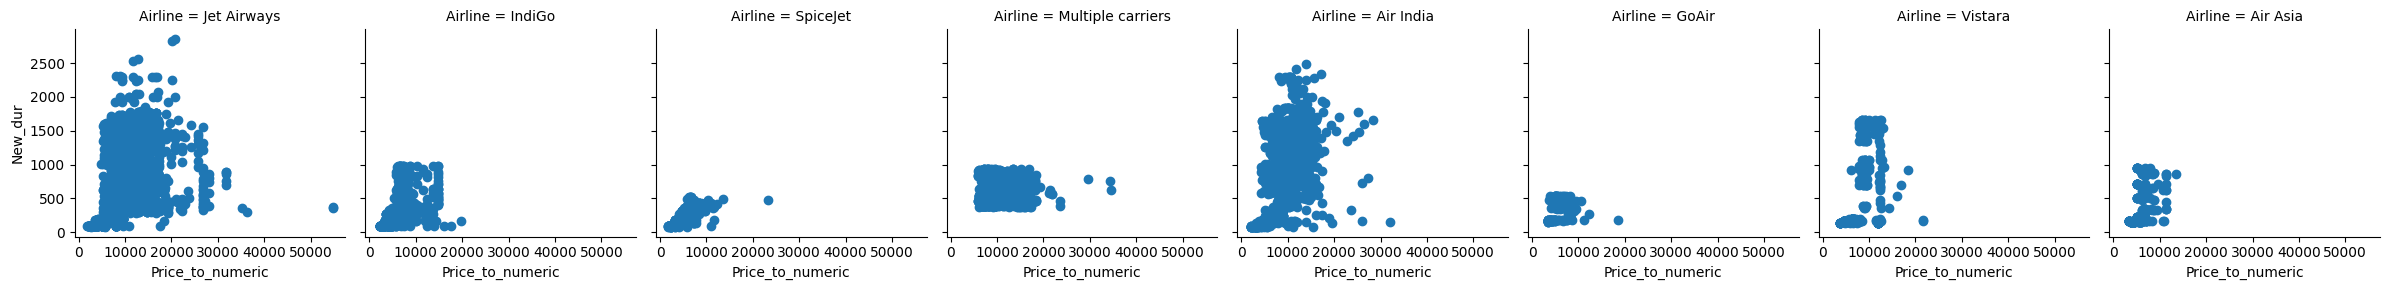

In [49]:
g = sns.FacetGrid(data1,col="Airline")
g.map(plt.scatter, "Price_to_numeric","New_dur")


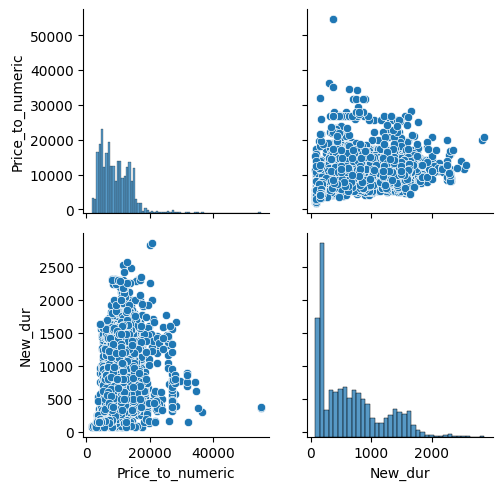

In [48]:
g = sns.PairGrid(data1,vars=["Price_to_numeric","New_dur"])
g = g.map_diag(sns.histplot)
g = g.map_offdiag(sns.scatterplot)

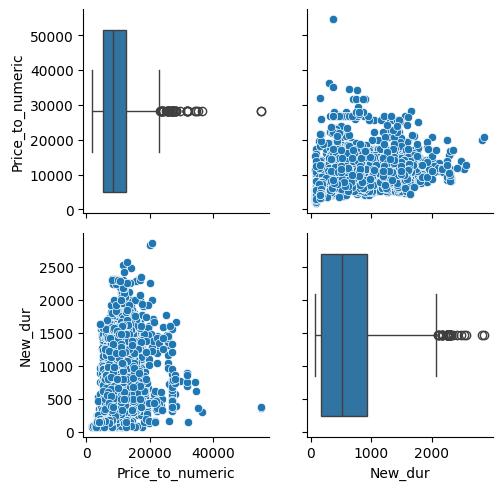

In [50]:
g = sns.PairGrid(data1,vars=["Price_to_numeric","New_dur"])
g = g.map_diag(sns.boxplot)
g = g.map_offdiag(sns.scatterplot)

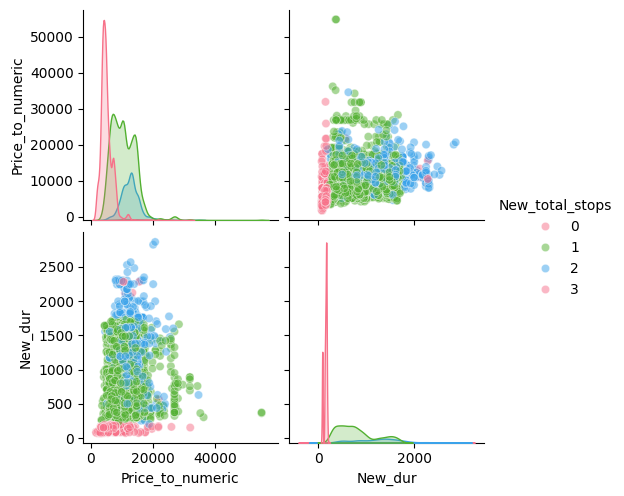

In [52]:
sns.pairplot(data1.query("New_total_stops<4"),vars=["Price_to_numeric","New_dur"],hue="New_total_stops",palette="husl",plot_kws={"alpha":0.5})

Bunda biz total stoplar bilan uchish davomiyligini hamda price ortasidagi bogliqlikni ifodalovchi plotlarni korib chiqdik